Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


<div class="alert alert-block alert-info">
<b>Артем, привет. Спасибо за проверку проекта!</b> ...
</div>

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import boto3
import os
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [2]:
import boto3
import os
from dotenv import load_dotenv
load_dotenv()

def get_session_student():
    session = boto3.session.Session()
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get('AWS_ACCESS_KEY_ID_STUDENT'),
        aws_secret_access_key=os.environ.get('AWS_SECRET_ACCESS_KEY_STUDENT')
    )
 
s3 = get_session_student()
bucket_name = os.environ.get('S3_BUCKET_NAME')
 
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in key['Key']:
            print(key['Key'])


# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', Key='data/initial_data.csv')

recsys/data/als_recommendations.npz
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/genres_encoder.npy
recsys/data/items.parquet
recsys/data/items_encoder.npy
recsys/data/user_encoder.npy
recsys/recommendations/personal_als.parquet
recsys/recommendations/similar.parquet
recsys/recommendations/top_popular.parquet


In [5]:
import io
import csv

def load_csv_from_s3(bucket_name, key_name, s3_client):
    """
    Load a CSV file from S3 into memory.
    Args:
        bucket_name (str): The name of the S3 bucket.
        key_name (str): The object key in S3.
        s3_client: Boto3 S3 client.
    Returns:
        list: A list of rows from the CSV file.
    """
    # Create a buffer
    csv_buffer = io.BytesIO()
    
    # Download the file into the buffer
    s3_client.download_fileobj(bucket_name, key_name, csv_buffer)
    
    # Reset the buffer's position to the start
    csv_buffer.seek(0)
    
    # Read the CSV from the buffer
    csv_reader = csv.reader(io.TextIOWrapper(csv_buffer, encoding='utf-8'))
    rows = list(csv_reader)  # Convert to a list of rows
    return rows

# Call the function to load the CSV
als_recommendations = load_csv_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/als_recommendations.csv',
    s3_client=s3
)


In [12]:
np.random.seed(42)

for i in range(3):
    print(als_recommendations[i])

['user_id', 'item_ids', 'scores']
['0', '275375,265629,381971,339789,282821,334138,347129,273369,217691,341440,280965,244600,221431,270458,308161,303527,296630,357305,342922,295936,307689,330464,339516,330401,384646,281950,223694,395826,287405,150675,307117,372756,384240,346372,196484,359454,353182,361435,338808,368654,380690,297129,276615,278750,385459,146858,237991,289481,244930,308801', '0.024032095,0.021947345,0.021340216,0.02116209,0.018825246,0.018749105,0.018598147,0.0184359,0.017945394,0.017935317,0.01771035,0.017701238,0.017419694,0.017080275,0.017061008,0.017039072,0.016647628,0.016442424,0.016253436,0.016218517,0.016213216,0.01605447,0.016006913,0.015540657,0.0155136045,0.015504968,0.014964655,0.014931646,0.014825653,0.014800899,0.0147728585,0.01460564,0.014505247,0.014467254,0.014449484,0.014408672,0.014329691,0.014276411,0.014205804,0.014149512,0.014119548,0.014108205,0.013888743,0.013869556,0.013830721,0.013405381,0.013338411,0.013331823,0.013264987,0.013171654']
['1', '8

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Импорты сделаны, отлично! Также приведены основные функции, которые будут использоваться в проекте!
</div>

<div class="alert alert-warning">

⚠️ Стоило сразу зафиксировать `SEED` (random state).Это поможет тебе добиться воспроизводимости результатов.
</div>

<div class="alert alert-block alert-info">
<b>Согласен, зафиксировал seed в предыдущей ячейке с кодом</b> ...
</div>

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet("data/tracks.parquet")
catalog = pd.read_parquet("data/catalog_names.parquet")
interactions = pd.read_parquet("data/interactions.parquet")

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
tracks.info()
tracks.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


,track_id,albums,artists,genres
999995,101478482,[21399811],[5540395],"[3, 75]"
999996,101490148,[21403052],[9078726],"[11, 20]"
999997,101493057,[21403883],[11865715],"[44, 75]"
999998,101495927,[21404975],[4462686],"[3, 75]"
999999,101521819,[21414638],[5056591],"[3, 75]"


In [5]:
catalog.info()
catalog.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


,id,type,name
1812466,101478482,track,На лицо
1812467,101490148,track,Без капли мысли
1812468,101493057,track,SKITTLES
1812469,101495927,track,Москва
1812470,101521819,track,Вокзал


In [6]:
interactions.info()
interactions.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


,user_id,track_id,track_seq,started_at
287,1374582,95514767,288,2022-12-29
288,1374582,97220301,289,2022-12-29
289,1374582,97241171,290,2022-12-29
290,1374582,98542641,291,2022-12-29
291,1374582,100736375,292,2022-12-30


In [7]:
# Приведем тип user_id и track_id к int64

interactions.reset_index(drop=True, inplace=True )
interactions['user_id'] = interactions['user_id'].astype('int64')
interactions['track_id'] = interactions['track_id'].astype('int64')

In [8]:
# Проверим наличие в треках неизвестных идентификаторов альбомов

all_album_ids = set(catalog.loc[catalog['type'] == 'album', 'id'])
potentially_unidentified_albums = tracks[~tracks['albums'].apply(set).apply(lambda x: x.issubset(all_album_ids))]
potentially_unidentified_albums

,track_id,albums,artists,genres


In [9]:
# Проверим наличие в треках неизвестных идентификаторов исполнителей

all_artist_ids = set(catalog.loc[catalog['type'] == 'artist', 'id'])
potentially_unidentified_artists = tracks[~tracks['artists'].apply(set).apply(lambda x: x.issubset(all_artist_ids))]
potentially_unidentified_artists

,track_id,albums,artists,genres


In [10]:
# Проверим наличие в треках неизвестных идентификаторов жанров

all_genres_ids = set(catalog.loc[catalog['type'] == 'genre', 'id'])
exploded_tracks = tracks.explode('genres')
unidentified_genres = exploded_tracks[~exploded_tracks['genres'].apply(lambda x: True if x in all_genres_ids else False)]

In [11]:
genre_ids = list(unidentified_genres['genres'].dropna().unique())
genre_types = ['genre' for i in range(len(genre_ids))]
genre_names = ['other' for i in range(len(genre_ids))]

added_genres = pd.DataFrame({'id':genre_ids,
                             'type':genre_types,
                             'name':genre_names})
catalog = pd.concat([catalog, added_genres], ignore_index=True)

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

In [12]:
# С данными явных проблем не замечено, пришлось лишь привести колонки id треков 
# и пользователей из таблицы interactions, а также дополнить таблицу каталога 30ю 
# идентификаторами неизвестных жанров и отнести их к категории other.

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ ОК!
</div>

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

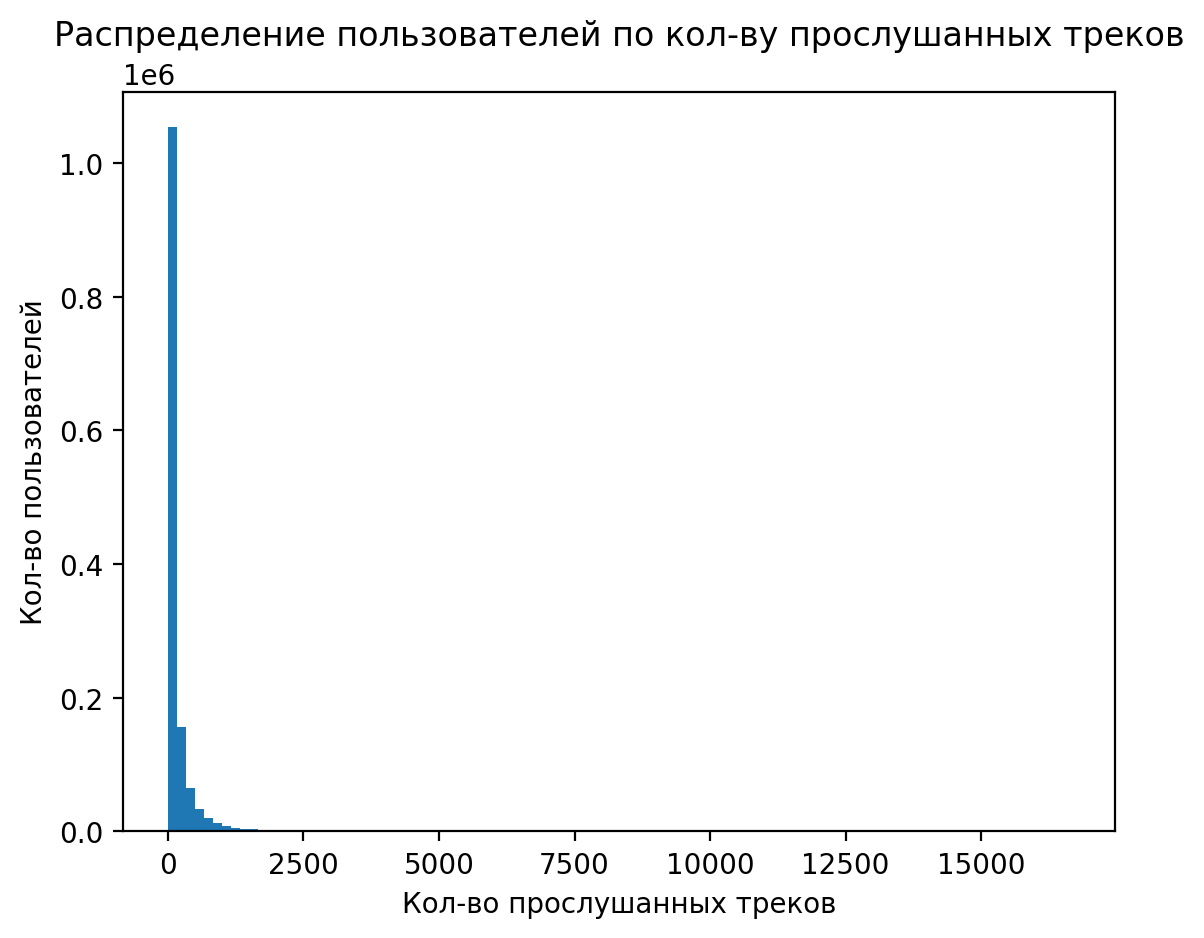

In [25]:
user_aggregate_plays = interactions.groupby('user_id')\
    .agg({'track_id': 'count'})\
        .rename(columns={'track_id': 'n_tracks'})
user_aggregate_plays = user_aggregate_plays.sort_values(by='n_tracks',
                                                        ascending=False).reset_index()
user_aggregate_plays_under_50 = user_aggregate_plays[user_aggregate_plays['n_tracks'] < 50]['n_tracks'].reset_index(drop=True)

plt.title("Распределение пользователей по кол-ву прослушанных треков")
plt.hist(user_aggregate_plays['n_tracks'], bins=100);
plt.xlabel("Кол-во прослушанных треков");
plt.ylabel("Кол-во пользователей");

In [20]:
user_aggregate_plays['n_tracks_log'] = np.log(user_aggregate_plays['n_tracks'])

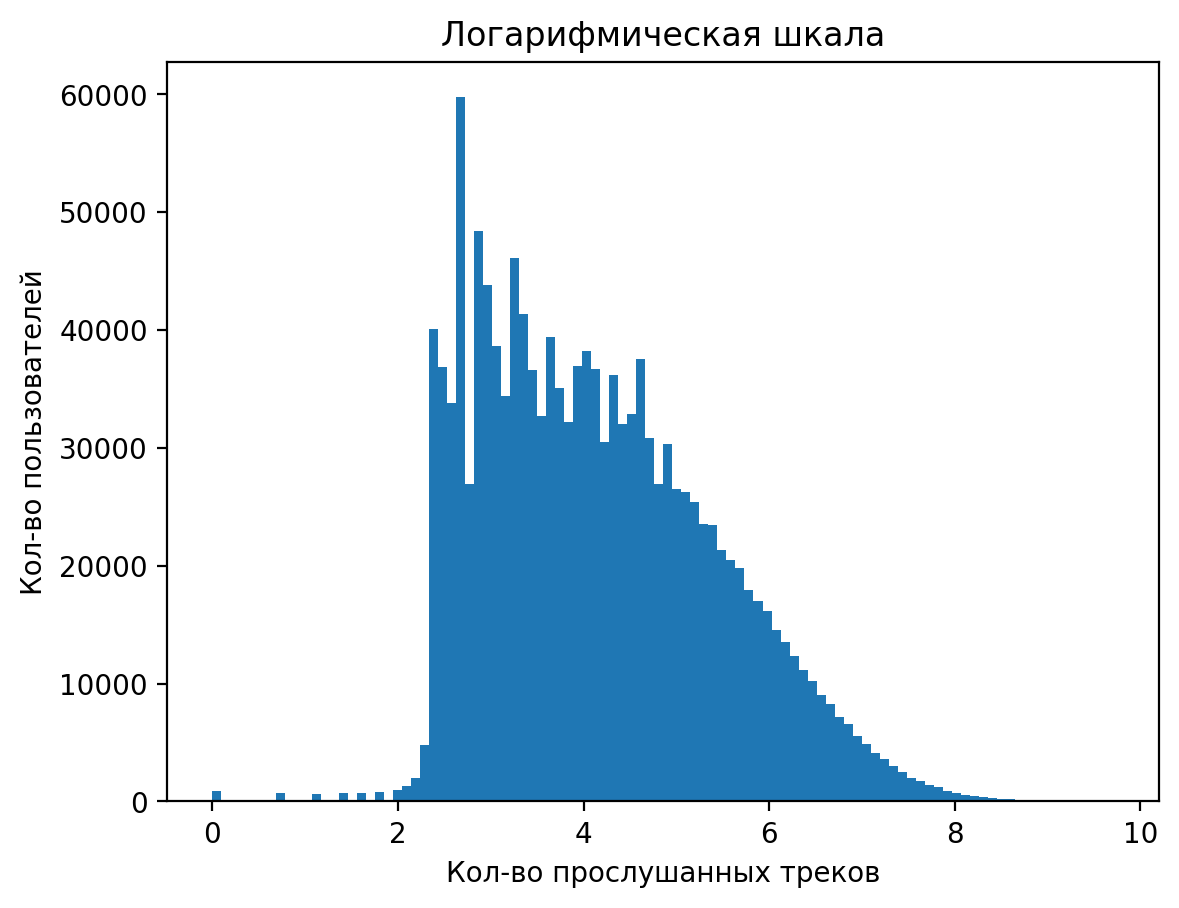

In [23]:
plt.title("Логарифмическая шкала")
plt.hist(user_aggregate_plays['n_tracks_log'], bins=100);
plt.xlabel("Кол-во прослушанных треков");
plt.ylabel("Кол-во пользователей");

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Импорты сделаны, отлично! 
</div>

<div class="alert alert-warning">

⚠️ Нагляднее было бы, если оси были подписаны. Также стоит рассмотреть применения логарифмической шкалы для оси Y.
</div>

<div class="alert alert-block alert-info">
<b>Добавил подписи и лог шкалу</b> ...
</div>

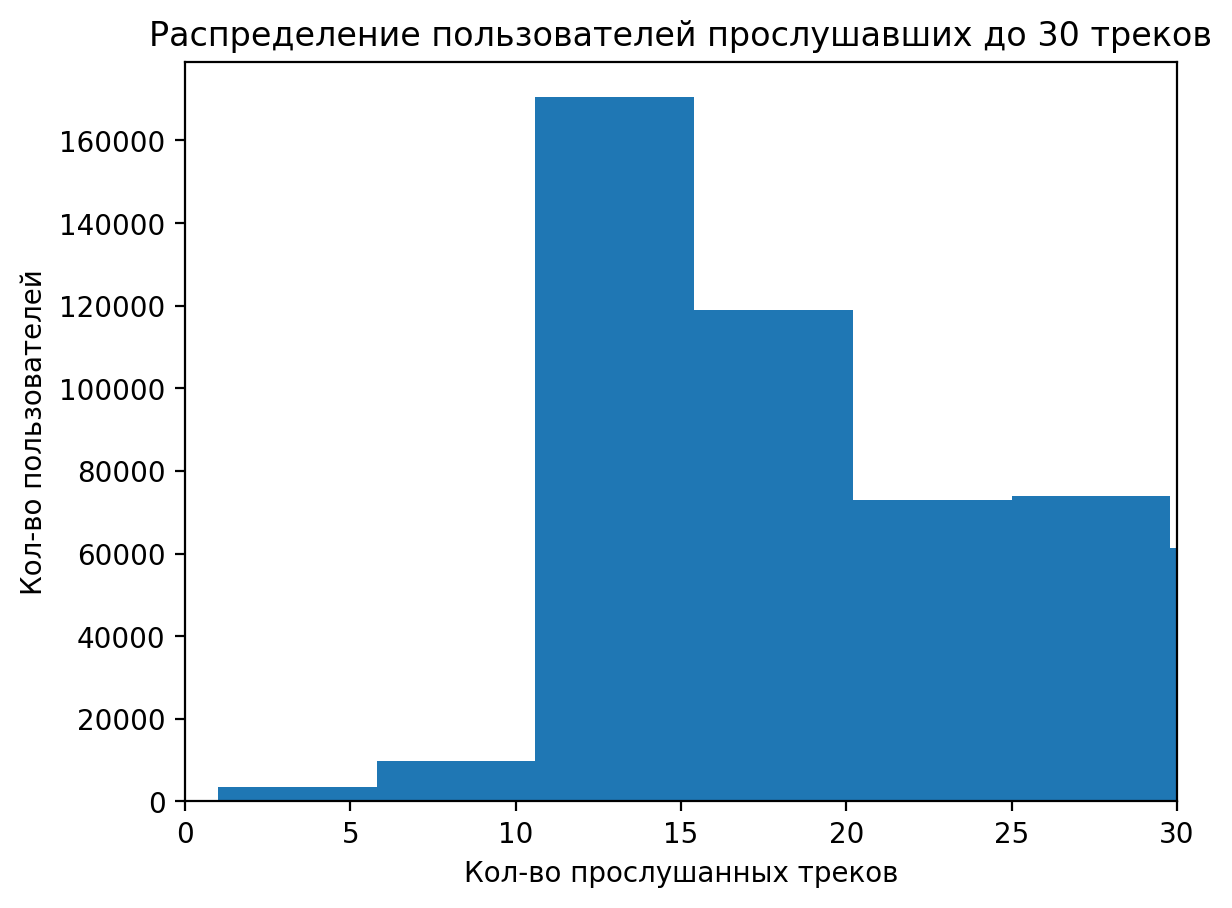

In [27]:
plt.title("Распределение пользователей прослушавших до 30 треков")

plt.hist(user_aggregate_plays_under_50);
plt.xlim(0, 30);

plt.xlabel("Кол-во прослушанных треков");
plt.ylabel("Кол-во пользователей");

Наиболее популярные треки

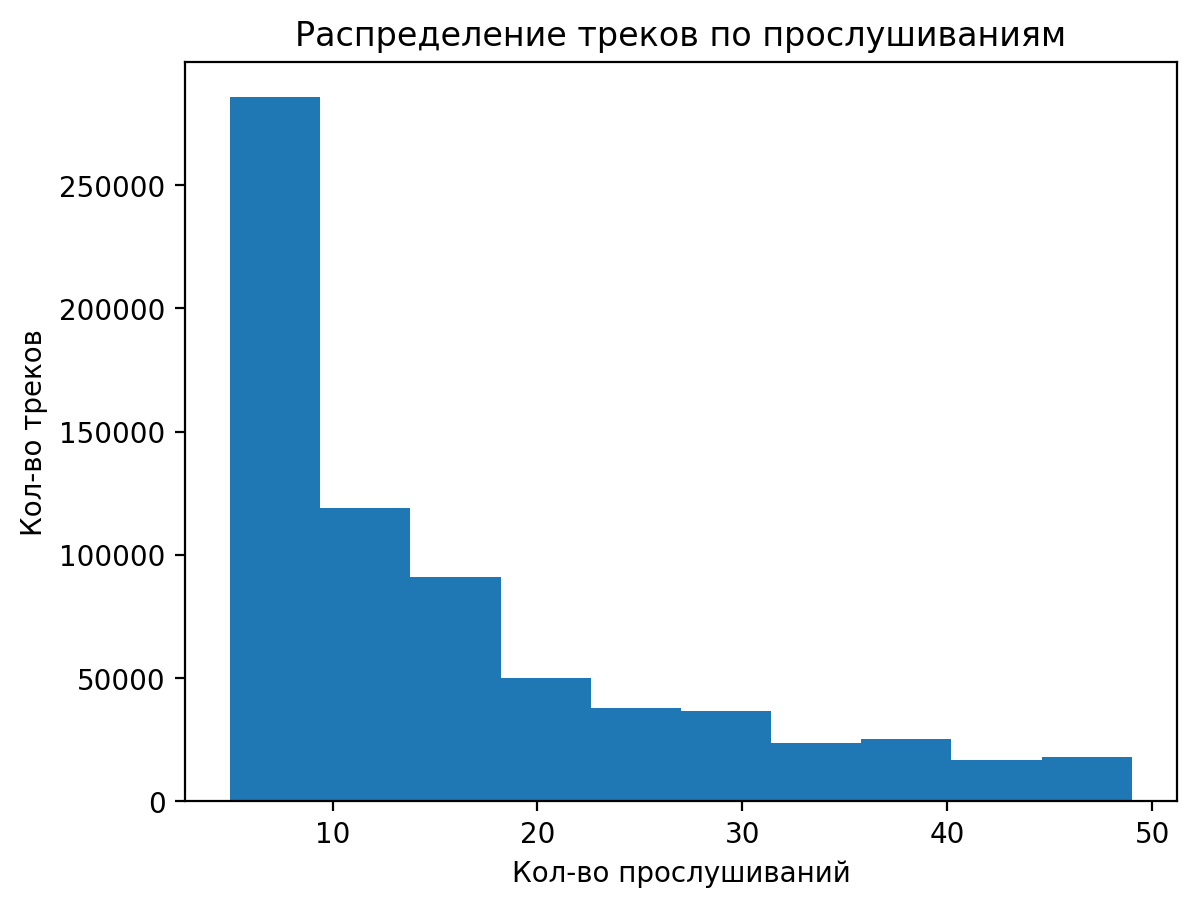

In [29]:
track_aggregate_plays = interactions.groupby('track_id')\
    .agg({'user_id': 'count'})\
        .rename(columns={'user_id': 'num_plays'})
track_aggregate_plays = track_aggregate_plays.sort_values(by='num_plays', 
                                                          ascending=False).reset_index()
track_aggregate_plays_under_50 = track_aggregate_plays[track_aggregate_plays['num_plays'] < 50]['num_plays'].reset_index(drop=True)

plt.title("Распределение треков по прослушиваниям");
plt.hist(track_aggregate_plays_under_50);
plt.xlabel("Кол-во прослушиваний");
plt.ylabel("Кол-во треков");

In [16]:
pd.merge(track_aggregate_plays, 
         catalog[catalog['type'] == 'track'][['id', 'name']],
         left_on='track_id',
         right_on='id',
         how='left').head(10)

,track_id,num_plays,id,name
0,53404,111062,53404,Smells Like Teen Spirit
1,33311009,106921,33311009,Believer
2,178529,101924,178529,Numb
3,35505245,99490,35505245,I Got Love
4,65851540,86670,65851540,Юность
5,24692821,86246,24692821,Way Down We Go
6,32947997,85886,32947997,Shape of You
7,51241318,85244,51241318,In The End
8,795836,85042,795836,Shape Of My Heart
9,45499814,84748,45499814,Life


Топ 5 треков от nirvana, imagine dragons, lin park и муджус

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выглядит логично! Спасибо за визуализацию!
</div>

Наиболее популярные жанры

In [17]:
enriched_track_plays=  pd.merge(track_aggregate_plays, 
                                tracks[['track_id', 'genres']], 
                                left_on='track_id',
                                right_on='track_id', 
                                how='left')

enriched_track_plays_exploded = enriched_track_plays.explode('genres')
genres_agg = enriched_track_plays_exploded.groupby('genres')\
    .agg({'num_plays':'sum'})\
        .sort_values('num_plays', ascending=False)\
            .reset_index()

pd.merge(genres_agg,
         catalog[catalog['type'] == 'genre'][['id', 'name']],
         left_on='genres',
         right_on='id').head(10)

,genres,num_plays,id,name
0,11,55578312,11,pop
1,75,37799821,75,rap
2,102,31092013,102,allrock
3,20,26626241,20,ruspop
4,3,25303695,3,rusrap
5,68,20120981,68,electronics
6,16,16291557,16,dance
7,2,13166147,2,rusrock
8,14,12772644,14,rock
9,47,12437375,47,metal


Видим, что самые популярные жанры - поп, рэп, рок, русские поп и рэп

Треки, которые никто не прослушал

In [18]:
set(tracks['track_id']) - set(enriched_track_plays['track_id'])

set()

In [19]:
enriched_track_plays[enriched_track_plays['num_plays'] == 5]

,track_id,num_plays,genres
946210,26,5,"[11, 21]"
946211,101223525,5,"[44, 75]"
946212,101223837,5,[70]
946213,101224609,5,"[11, 20]"
946214,101227724,5,[16]
...,...,...,...
999995,84391078,5,[62]
999996,84391079,5,[62]
999997,84391080,5,[62]
999998,34766819,5,[13]


Прям совсем непрослушанных треков нет, но наименее прослушанных треков 53к записей из 1kk

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [20]:
items = tracks.copy()
events = interactions.copy()

del tracks 
del interactions

In [8]:
%whos DataFrame

Variable       Type         Data/Info
-------------------------------------
catalog        DataFrame                    id   type<...>1812471 rows x 3 columns]
events         DataFrame               user_id    ite<...>2619423 rows x 4 columns]
events_test    DataFrame               user_id    ite<...>3896365 rows x 4 columns]
events_train   DataFrame               user_id   item<...>8723058 rows x 4 columns]
items          DataFrame              item_id        <...>1000000 rows x 4 columns]


In [22]:
del added_genres
del catalog 
del enriched_track_plays
del enriched_track_plays_exploded
del exploded_tracks
del genres_agg
del potentially_unidentified_albums
del potentially_unidentified_artists
del track_aggregate_plays
del unidentified_genres
del user_aggregate_plays

In [22]:
user_counts = events['user_id'].value_counts()
uids = user_counts[user_counts > 5].index

filtered_events = events[events['user_id'].isin(uids)]
# filtered_events.sort_values(by='user_id', inplace=True)
filtered_events.reset_index(drop=True, inplace=True)

cols_to_rename = {'track_id': 'item_id'}
filtered_events.rename(columns=cols_to_rename, inplace=True)
items.rename(columns=cols_to_rename, inplace=True)

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [ ]:
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', 
#                  Key='recsys/data/events.parquet')
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', 
#                  Key='recsys/data/items.parquet')
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', 
#                  Key='recsys/data/catalog.parquet')

In [ ]:
import io

def put_df_to_s3(df: pd.DataFrame, bucket_name: str, file_key: str, s3_client):
    buffer = io.BytesIO()
    df.to_parquet(buffer, index=False)
    buffer.seek(0)
    
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=buffer)
    print(f"Uploaded {file_key} to {bucket_name}.")

put_df_to_s3(filtered_events, bucket_name, 'recsys/data/events.parquet', s3)
put_df_to_s3(items, bucket_name, 'recsys/data/items.parquet', s3)
put_df_to_s3(catalog, bucket_name, 'recsys/data/catalog.parquet', s3)


In [3]:
 
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in str(key['Key']):
            print(key['Key'])

recsys/data/als_recommendations.csv
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/items.parquet
recsys/data/top_popular.parquet


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [20]:
%whos DataFrame

Variable          Type         Data/Info
----------------------------------------
catalog           DataFrame                    id   type<...>1812471 rows x 3 columns]
events            DataFrame         user_id   track_id  <...>2629898 rows x 4 columns]
filtered_events   DataFrame               user_id    ite<...>2619423 rows x 4 columns]
items             DataFrame              item_id        <...>1000000 rows x 4 columns]


In [21]:
del events

 <b>Комментарий от ревьюера v1</b>
 
<div class="alert alert-block alert-success">
✔️ EDA проведен, отлично!
</div>

<div class="alert alert-warning">
⚠️ После EDA хотелось бы видеть выводы и выдвинутые гипотезы, которые можно проверить при моделировании. Ведь в этом ценность EDA.
</div>

<div class="alert alert-block alert-info">
<b>Ага, добавил небольшие выводы ниже</b>
</div>

Мы видим, что большинство пользователей либо не пользуются сервисом, либо прослушивают какое-то миннимальное количество треков, например до 5.
Наши данные не включают треки, для которых нет прослушиваний, и наименьшее количество прослешиваний для трека равно 5. В то же время, большинство треков находится в начале распределения и были прослушаны в районе 5-15 раз.

Из этого может следовать, что рекоммендации через популярные треки может хорошо себя показать, так как пользователи не склонны к самостоятельному поиску и иизучению треков.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [36]:
import warnings
warnings.filterwarnings('ignore')

import logging

# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [37]:
# !pip install boto3
# !pip install python-dotenv

In [38]:
import boto3
import os
import io
import csv
from dotenv import load_dotenv
load_dotenv()

def get_session_student():
    session = boto3.session.Session()
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get('AWS_ACCESS_KEY_ID_STUDENT'),
        aws_secret_access_key=os.environ.get('AWS_SECRET_ACCESS_KEY_STUDENT')
    )

def load_par_from_s3(bucket_name, key_name, s3_client):
    parquet_buffer = io.BytesIO()
    s3_client.download_fileobj(bucket_name, key_name, parquet_buffer)
    parquet_buffer.seek(0)
    df = pd.read_parquet(parquet_buffer)
    return df
 
s3 = get_session_student()
bucket_name = os.environ.get('S3_BUCKET_NAME')

events = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/events.parquet',
    s3_client=s3
)

items = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/items.parquet',
    s3_client=s3
)

catalog = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/catalog.parquet',
    s3_client=s3
)

# als_recommendations = load_csv_from_s3(
#     bucket_name=bucket_name,
#     key_name='recsys/data/als_recommendations.csv',
#     s3_client=s3
# )

In [45]:
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in key['Key']:
            print(key['Key'])

recsys/data/als_recommendations.npz
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/genres_encoder.npy
recsys/data/items.parquet
recsys/data/items_encoder.npy
recsys/data/user_encoder.npy
recsys/recommendations/personal_als.parquet
recsys/recommendations/similar.parquet


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [40]:
date_to_slice_by = pd.to_datetime('2022-12-16')
train_idices = events['started_at'] < date_to_slice_by

events_train = events[train_idices].copy()
events_test = events[~train_idices].copy()

In [41]:
users_train = events_train['user_id'].drop_duplicates()
users_test = events_test['user_id'].drop_duplicates()

common_users = set(users_train).intersection(set(users_test))
cold_users = list(set(users_test) - set(users_train))

print('Num users in train: ', str(len(users_train)))
print('Num users in test: ', str(len(users_test)))
print('Num common users: ', str(len(common_users)))
print('Num cold users: ', str(len(cold_users)))

Num users in train:  1339127
Num users in test:  781881
Num common users:  751404
Num cold users:  30477


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично, выборки train / test сформированы. 

Выборки train / test можно получать несколькими способами (см. картинку ниже)
</div>

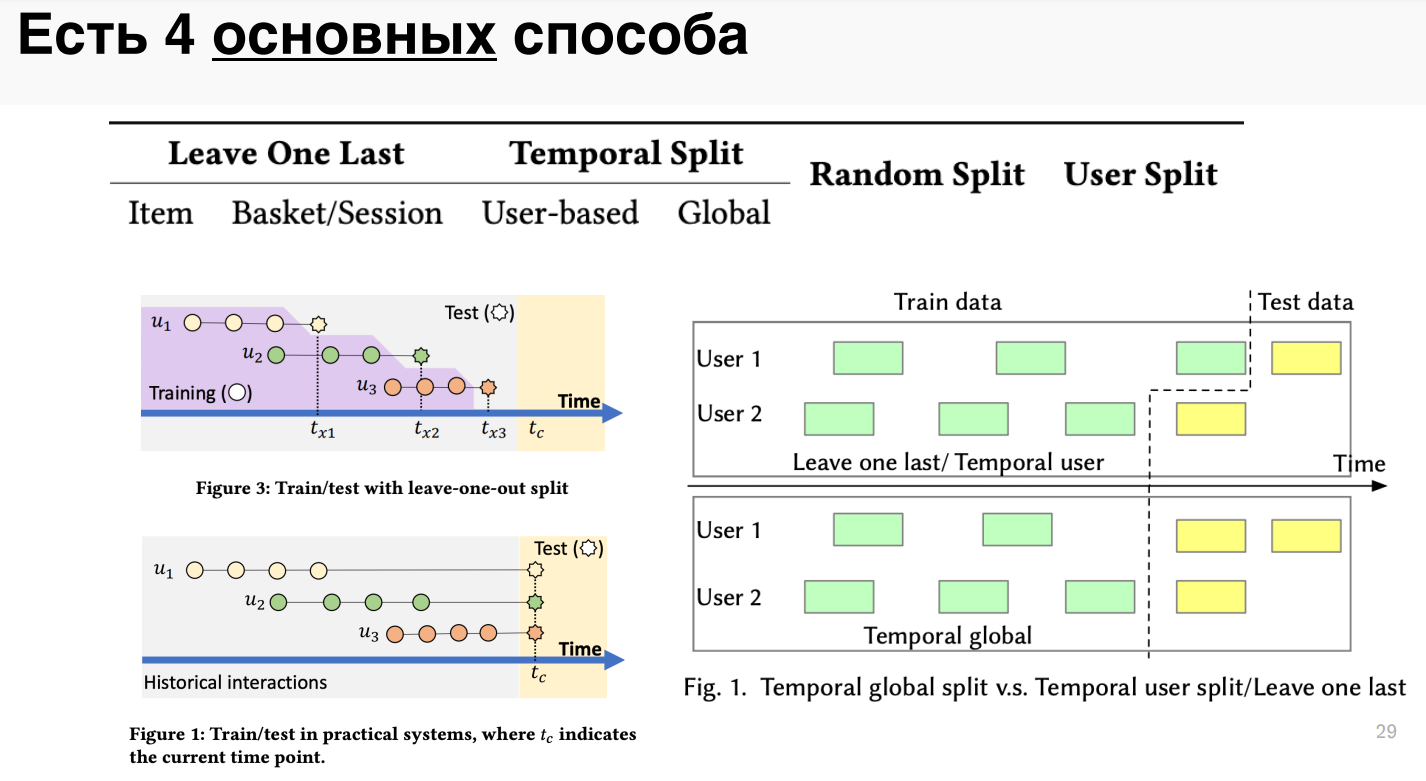

[Ссылка на картинку](https://disk.yandex.ru/i/L6hBTf6KLYRa-g)

In [42]:
all_genres_ids = set(catalog.loc[catalog['type'] == 'genre', 'id'])
exploded_tracks = items.explode('genres')
unidentified_genres = exploded_tracks[~exploded_tracks['genres'].apply(lambda x: True if x in all_genres_ids else False)]

genre_ids = list(unidentified_genres['genres'].dropna().unique())
genre_types = ['genre' for i in range(len(genre_ids))]
genre_names = ['other' for i in range(len(genre_ids))]

added_genres = pd.DataFrame({'id':genre_ids,
                             'type':genre_types,
                             'name':genre_names})
catalog = pd.concat([catalog, added_genres], ignore_index=True)

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [46]:
%whos DataFrame

Variable                Type         Data/Info
----------------------------------------------
added_genres            DataFrame         id   type   name\n0 <...>er\n29  148  genre  other
catalog                 DataFrame              id   type      <...>1812501 rows x 3 columns]
events                  DataFrame               user_id    ite<...>2619423 rows x 4 columns]
events_test             DataFrame               user_id    ite<...>3896365 rows x 4 columns]
events_train            DataFrame               user_id   item<...>8723058 rows x 4 columns]
exploded_tracks         DataFrame              item_id        <...>1656345 rows x 4 columns]
items                   DataFrame              item_id        <...>1000000 rows x 4 columns]
track_aggregate_plays   DataFrame             item_id  num_pla<...>1000000 rows x 2 columns]
unidentified_genres     DataFrame              item_id        <...>n[52056 rows x 4 columns]


In [47]:
track_aggregate_plays = events_train.groupby('item_id')\
    .agg({'user_id': 'count'})\
        .rename(columns={'user_id': 'num_plays'})

track_aggregate_plays = track_aggregate_plays.sort_values(by='num_plays', 
                                                          ascending=False).reset_index()

In [49]:
top_popular = pd.merge(track_aggregate_plays.loc[:99, :], 
                       catalog[catalog['type'] == 'track'], 
                       left_on='item_id', 
                       right_on='id',
                       how='left').drop(['id', 'type'], axis=1)


def put_df_to_s3(df: pd.DataFrame, bucket_name: str, file_key: str, s3_client):
    buffer = io.BytesIO()
    df.to_parquet(buffer, index=False)
    buffer.seek(0)
    
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=buffer)
    print(f"Uploaded {file_key} to {bucket_name}.")

put_df_to_s3(top_popular, bucket_name, 'recsys/recommendations/top_popular.parquet', s3)

Uploaded recsys/recommendations/top_popular.parquet to s3-student-mle-20240625-3348db98ef.


In [50]:
top_popular

,item_id,num_plays,name
0,53404,110021,Smells Like Teen Spirit
1,33311009,101072,Believer
2,178529,100864,Numb
3,35505245,95520,I Got Love
4,24692821,84153,Way Down We Go
...,...,...,...
95,68562711,47588,Сияй
96,75944934,47536,Astronaut In The Ocean
97,75642961,47437,Венера-Юпитер
98,29175370,47319,Рапапам



<b> Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично, топ-100 треков сформированы.
</div>

<div class="alert alert-warning">
    
⚠️ Топ в таких случаях стоит считать на `train` выборке. Так мы честно сможем оценить качество рекомендаций на `test` выборке.

<div class="alert alert-block alert-info">
<b>Да, спасибо, пересчитал на трейне</b>
</div>

# Персональные

Рассчитаем персональные рекомендации.

In [7]:
import scipy 
import sklearn.preprocessing 

user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events['user_id'])

events_train['user_id'] = user_encoder.transform(events_train['user_id'])
events_test['user_id'] = user_encoder.transform(events_test['user_id'])

items_encoder = sklearn.preprocessing.LabelEncoder()
items_encoder.fit(items['item_id'])

items['item_id'] = items_encoder.transform(items['item_id'])
events_train['item_id'] = items_encoder.transform(events_train['item_id'])
events_test['item_id'] = items_encoder.transform(events_test['item_id'])

In [8]:
len(set(items['item_id']))

1000000

Заметим, что у нас нет рейтингов или оценок пользователями треков. Го посмотрим на количество прослушиванний одних треков каждым юзером:

In [8]:
events_train['num_of_plays'] = events_train.groupby(['user_id', 'item_id'])['user_id'].transform('count')
events_train['num_of_plays'].unique()

array([1])

In [ ]:
events_train = events_train.drop(columns='num_of_plays')

О-о, каждый юзер в выборке послушал любой трек не больше 1го раза.

Тогда для аппроксимации рейтинга можем взять последовательность прослушанного трека и разделить это число на сумму мне порядков треков в очереди для юзера.  Таким образом, мы будем придавать больший вес недавним трекам, и чем меньше треков прослушал пользователь, тем больший вес присваивается последним трекам.


<b> Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Хорошая гипотеза!
</div>


In [11]:
events_train['so_called_rating'] = events_train['track_seq']/events_train.groupby('user_id')['track_seq'].transform('sum')

In [12]:
user_item_matrix_train = scipy.sparse.csr_matrix(
    (
        events_train['so_called_rating'],
        (events_train['user_id'], events_train['item_id'])
    ),
    dtype=np.int8
)

In [13]:
from implicit.als import AlternatingLeastSquares 

als_model = AlternatingLeastSquares(factors=20,
                                    iterations=20,
                                    regularization=0.05,
                                    random_state=0)
als_model.fit(user_item_matrix_train)

100%|██████████| 20/20 [08:25<00:00, 25.26s/it]


In [115]:
user_ids_encoded = range(len(user_encoder.classes_))

als_recommendations = als_model.recommend(user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=20) 

In [116]:
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

buffer = io.BytesIO()
np.savez_compressed(buffer, id=item_ids_enc, scores=als_scores)
buffer.seek(0)

s3.put_object(Bucket=bucket_name, Key='recsys/data/als_recommendations.npz', Body=buffer)

{'ResponseMetadata': {'RequestId': '1cc526b13fd71ea0',
  'HostId': '',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx',
   'date': 'Sun, 08 Dec 2024 21:32:42 GMT',
   'content-type': 'application/octet-stream',
   'transfer-encoding': 'chunked',
   'connection': 'keep-alive',
   'keep-alive': 'timeout=60',
   'etag': '"a3b1d8cdf27132c50e82f45d10d4c40a"',
   'x-amz-request-id': '1cc526b13fd71ea0',
   'x-amz-version-id': '000628C8FCF5E0F4'},
  'RetryAttempts': 0},
 'ETag': '"a3b1d8cdf27132c50e82f45d10d4c40a"',
 'VersionId': '000628C8FCF5E0F4'}

In [118]:
buffer = io.BytesIO()
np.save(buffer, user_encoder.classes_)
buffer.seek(0)

s3.put_object(Bucket=bucket_name, Key='recsys/data/user_encoder.npy', Body=buffer)

{'ResponseMetadata': {'RequestId': '9c3c2f24c7f2407b',
  'HostId': '',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx',
   'date': 'Sun, 08 Dec 2024 21:34:35 GMT',
   'content-type': 'application/octet-stream',
   'transfer-encoding': 'chunked',
   'connection': 'keep-alive',
   'keep-alive': 'timeout=60',
   'etag': '"e784821e9234007ba17c0fe7d20abee4"',
   'x-amz-request-id': '9c3c2f24c7f2407b',
   'x-amz-version-id': '000628C903A84F71'},
  'RetryAttempts': 0},
 'ETag': '"e784821e9234007ba17c0fe7d20abee4"',
 'VersionId': '000628C903A84F71'}

In [119]:
buffer = io.BytesIO()
np.save(buffer, items_encoder.classes_)
buffer.seek(0)

s3.put_object(Bucket=bucket_name, Key='recsys/data/items_encoder.npy', Body=buffer)

{'ResponseMetadata': {'RequestId': 'd3a0f7366ccad878',
  'HostId': '',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx',
   'date': 'Sun, 08 Dec 2024 21:34:37 GMT',
   'content-type': 'application/octet-stream',
   'transfer-encoding': 'chunked',
   'connection': 'keep-alive',
   'keep-alive': 'timeout=60',
   'etag': '"6e7c5542f5d44627e4f3cd83669c72c5"',
   'x-amz-request-id': 'd3a0f7366ccad878',
   'x-amz-version-id': '000628C903CD3BDE'},
  'RetryAttempts': 0},
 'ETag': '"6e7c5542f5d44627e4f3cd83669c72c5"',
 'VersionId': '000628C903CD3BDE'}

In [120]:
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in str(key['Key']):
            print(key['Key'])

recsys/data/als_recommendations.npz
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/items.parquet
recsys/data/items_encoder.npy
recsys/data/user_encoder.npy
recsys/recommendations/top_popular.parquet


In [121]:
# download_buffer = io.BytesIO()
# s3.download_fileobj(bucket_name, 'recsys/data/als_recommendations.npz', download_buffer)
# download_buffer.seek(0)
# loaded_data = np.load(download_buffer)

# item_ids_enc = loaded_data['id']
# als_scores = loaded_data['scores']

item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations_pd = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})


In [122]:
als_recommendations_pd_exploded = als_recommendations_pd.explode(["item_id_enc", "score"], ignore_index=True)
als_recommendations_pd_exploded

,user_id_enc,item_id_enc,score
0,0,2054,0.0
1,0,10603,0.0
2,0,308801,0.0
3,0,58621,0.0
4,0,6669,0.0
...,...,...,...
27392075,1369603,7620,0.0
27392076,1369603,618207,0.0
27392077,1369603,17505,0.0
27392078,1369603,19854,0.0


In [123]:
# приводим типы данных
als_recommendations_pd_exploded["item_id_enc"] = als_recommendations_pd_exploded["item_id_enc"].astype("int")
als_recommendations_pd_exploded["score"] = als_recommendations_pd_exploded["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations_pd_exploded["user_id"] = user_encoder.inverse_transform(als_recommendations_pd_exploded["user_id_enc"])
als_recommendations_pd_exploded["item_id"] = items_encoder.inverse_transform(als_recommendations_pd_exploded["item_id_enc"])
als_recommendations_pd_exploded = als_recommendations_pd_exploded.drop(columns=["user_id_enc", "item_id_enc"])

In [125]:
import io

def put_df_to_s3(df: pd.DataFrame, bucket_name: str, file_key: str, s3_client):
    buffer = io.BytesIO()
    df.to_parquet(buffer, index=False)
    buffer.seek(0)
    
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=buffer)
    print(f"Uploaded {file_key} to {bucket_name}.")

put_df_to_s3(als_recommendations_pd_exploded, bucket_name, 'recsys/recommendations/personal_als.parquet', s3)

Uploaded recsys/recommendations/personal_als.parquet to s3-student-mle-20240625-3348db98ef.


In [52]:
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in str(key['Key']):
            print(key['Key'])

recsys/data/als_recommendations.npz
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/genres_encoder.npy
recsys/data/items.parquet
recsys/data/items_encoder.npy
recsys/data/user_encoder.npy
recsys/recommendations/personal_als.parquet
recsys/recommendations/top_popular.parquet


In [27]:
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', Key='recsys/data/genres.npy')
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', Key='recsys/data/items_encoder.npy')
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', Key='recsys/data/user_encoder.npy')
# s3.delete_object(Bucket='s3-student-mle-20240625-3348db98ef', Key='recsys/recommendations/personal_als.parquet')

In [28]:
# del als_recommendations
# del als_recommendations_pd
# del track_aggregate_plays

%whos DataFrame

Variable              Type         Data/Info
--------------------------------------------
added_genres          DataFrame         id   type   name\n0 <...>er\n29  148  genre  other
catalog               DataFrame              id   type      <...>1812501 rows x 3 columns]
events                DataFrame               user_id    ite<...>2619423 rows x 4 columns]
events_test           DataFrame               user_id    ite<...>3896365 rows x 4 columns]
events_train          DataFrame               user_id   item<...>8723058 rows x 4 columns]
exploded_tracks       DataFrame              item_id        <...>1656345 rows x 4 columns]
items                 DataFrame              item_id        <...>1000000 rows x 4 columns]
unidentified_genres   DataFrame              item_id        <...>n[52056 rows x 4 columns]



<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, персональные рекомендации сформированы!
</div>

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [20]:
# user_encoder
# items_encoder
# genres_encoder

LabelEncoder()

In [14]:
train_item_ids = events_train['item_id'].unique()
max_similar_items = 10

similar_items = als_model.similar_items(train_item_ids,
                                        N=max_similar_items)
sim_item_ids = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    'item_id': train_item_ids,
    'sim_item_ids': sim_item_ids.tolist(),
    'score': sim_item_scores.tolist()
})

print('Composed Similar Items pandas')

similar_items_exploded = similar_items.explode(['sim_item_ids', 'score'],
                                               ignore_index=True)

Composed Similar Items pandas


In [15]:
similar_items_exploded['sim_item_ids'] = similar_items_exploded['sim_item_ids'].astype('int')
similar_items_exploded['score'] = similar_items_exploded['score'].astype('float')

similar_items_exploded["item_id_1"] = items_encoder.inverse_transform(similar_items_exploded["item_id"])
similar_items_exploded["item_id_2"] = items_encoder.inverse_transform(similar_items_exploded["sim_item_ids"])
similar_items_exploded = similar_items_exploded.drop(columns=["item_id", "sim_item_ids"])

similar_items_exploded = similar_items_exploded.query("item_id_1 != item_id_2") 

In [17]:
import io

def put_df_to_s3(df: pd.DataFrame, bucket_name: str, file_key: str, s3_client):
    buffer = io.BytesIO()
    df.to_parquet(buffer, index=False)
    buffer.seek(0)
    
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=buffer)
    print(f"Uploaded {file_key} to {bucket_name}.")

put_df_to_s3(similar_items_exploded, bucket_name, 'recsys/recommendations/similar.parquet', s3)

Uploaded recsys/recommendations/similar.parquet to s3-student-mle-20240625-3348db98ef.


In [7]:
if s3.list_objects(Bucket=bucket_name).get('Contents'):
    for key in s3.list_objects(Bucket=bucket_name)['Contents']:
        if 'recsys' in str(key['Key']):
            print(key['Key'])

recsys/data/als_recommendations.npz
recsys/data/catalog.parquet
recsys/data/events.parquet
recsys/data/genres_encoder.npy
recsys/data/items.parquet
recsys/data/items_encoder.npy
recsys/data/user_encoder.npy
recsys/recommendations/personal_als.parquet
recsys/recommendations/similar.parquet
recsys/recommendations/top_popular.parquet


# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [52]:
# del similar_items
# del events
# del added_genres
# del unidentified_genres

%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
candidates               DataFrame              user_id   item_<...>7392080 rows x 4 columns]
candidates_for_train     DataFrame                         user<...>n\n[620 rows x 4 columns]
candidates_to_sample     DataFrame              user_id   item_<...>\n[1240 rows x 4 columns]
catalog                  DataFrame              id   type      <...>1812501 rows x 3 columns]
events_labels            DataFrame               user_id  item_<...>9286980 rows x 5 columns]
events_test              DataFrame               user_id  item_<...>3896365 rows x 4 columns]
events_test_2            DataFrame               user_id  item_<...>4609385 rows x 4 columns]
events_train             DataFrame               user_id  item_<...>8723058 rows x 5 columns]
exploded_tracks          DataFrame              item_id        <...>1656345 rows x 4 columns]
items                    DataFrame            item_id     

In [9]:
import boto3
import os
import io
from dotenv import load_dotenv
load_dotenv()

def get_session_student():
    session = boto3.session.Session()
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get('AWS_ACCESS_KEY_ID_STUDENT'),
        aws_secret_access_key=os.environ.get('AWS_SECRET_ACCESS_KEY_STUDENT')
    )

def load_par_from_s3(bucket_name, key_name, s3_client):
    parquet_buffer = io.BytesIO()
    s3_client.download_fileobj(bucket_name, key_name, parquet_buffer)
    parquet_buffer.seek(0)
    df = pd.read_parquet(parquet_buffer)
    return df
 
s3 = get_session_student()
bucket_name = os.environ.get('S3_BUCKET_NAME')

events = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/events.parquet',
    s3_client=s3
)

items = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/items.parquet',
    s3_client=s3
)

catalog = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/data/catalog.parquet',
    s3_client=s3
)

In [10]:
date_to_slice_by = pd.to_datetime('2022-12-16')
train_idices = events['started_at'] < date_to_slice_by

events_train = events[train_idices].copy()
events_test = events[~train_idices].copy()

In [11]:
split_date_for_labels = pd.to_datetime('2022-12-25')
split_date_for_labels_idx = events_test['started_at'] < split_date_for_labels

events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

In [12]:
def get_user_features(events):
    user_features = events.groupby('user_id').agg(
        listening_days=('started_at', lambda x: (x.max()-x.min()).days),
        tracks_played=('item_id', 'nunique')
    )
    
    user_features['tracks_per_month'] = user_features['tracks_played']/user_features['listening_days']/30.5

    return user_features

events_for_features = pd.concat([events_train, events_labels], ignore_index=True)
user_features_for_train = get_user_features(events_for_features)
user_features_for_train = user_features_for_train.replace([np.inf, -np.inf], 0)

In [13]:
# import boto3
# import os
# import io
# import csv
# from dotenv import load_dotenv
# load_dotenv()

# def get_session_student():
#     session = boto3.session.Session()
#     return session.client(
#         service_name='s3',
#         endpoint_url='https://storage.yandexcloud.net',
#         aws_access_key_id=os.environ.get('AWS_ACCESS_KEY_ID_STUDENT'),
#         aws_secret_access_key=os.environ.get('AWS_SECRET_ACCESS_KEY_STUDENT')
#     )

# def load_par_from_s3(bucket_name, key_name, s3_client):
#     parquet_buffer = io.BytesIO()
#     s3_client.download_fileobj(bucket_name, key_name, parquet_buffer)
#     parquet_buffer.seek(0)
#     df = pd.read_parquet(parquet_buffer)
#     return df
 
# s3 = get_session_student()
# bucket_name = os.environ.get('S3_BUCKET_NAME')

personal_als = load_par_from_s3(
    bucket_name=bucket_name,
    key_name='recsys/recommendations/personal_als.parquet',
    s3_client=s3
    )

In [14]:
candidates = personal_als[["user_id", "item_id", "score"]].copy()

events_labels['target'] = 1
candidates = candidates.merge(events_labels[["user_id", "item_id", "target"]], on=['user_id', 'item_id'], how='outer')
candidates["target"] = candidates["target"].fillna(0).astype("int")

candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [15]:
candidates_to_sample

,user_id,item_id,score,target
60,3,40461,2.229038e-12,0
61,3,16884,2.222117e-12,0
62,3,39946956,1.936096e-12,0
63,3,106716,1.740006e-12,0
64,3,10177,1.609044e-12,0
...,...,...,...,...
36673736,1374582,85923303,NaN,1
36673737,1374582,86169470,NaN,1
36673738,1374582,86263362,NaN,1
36673739,1374582,86351412,NaN,1


In [16]:
negatives_per_user = 10
candidates_for_train = pd.concat([
    candidates_to_sample.query('target == 1'),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ]) 

candidates_for_train = pd.merge(candidates_for_train.reset_index(drop=True), user_features_for_train.reset_index(), left_on='user_id', right_on='user_id', how='left')

In [17]:
candidates_for_train

,user_id,item_id,score,target,listening_days,tracks_played,tracks_per_month
0,300,560473,1.415704e-12,1,10,35,0.114754
1,310,39307896,1.000319e-12,1,41,45,0.035986
2,637,469369,4.195606e-08,1,6,8,0.043716
3,991,19972786,8.830814e-13,1,203,16,0.002584
4,1093,39307896,5.986285e-13,1,51,116,0.074574
...,...,...,...,...,...,...,...
16426535,1374582,106865,4.416409e-12,0,47,258,0.179979
16426536,1374582,20009250,8.635616e-12,0,47,258,0.179979
16426537,1374582,1721,5.761272e-12,0,47,258,0.179979
16426538,1374582,53404,1.018620e-11,0,47,258,0.179979


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [18]:
from catboost import CatBoostClassifier, Pool

features = ['score', 'listening_days', 'tracks_played', 'tracks_per_month']
target = 'target'

train_data = Pool(
    data=candidates_for_train[features],
    label=candidates_for_train[target]
)

cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

cb_model.fit(train_data, early_stopping_rounds=50)

0:	learn: 0.3263733	total: 568ms	remaining: 9m 27s
100:	learn: 0.0024059	total: 38.6s	remaining: 5m 43s
200:	learn: 0.0024059	total: 1m 15s	remaining: 4m 58s
300:	learn: 0.0024059	total: 1m 52s	remaining: 4m 20s
400:	learn: 0.0024059	total: 2m 29s	remaining: 3m 43s
500:	learn: 0.0024059	total: 3m 7s	remaining: 3m 6s
600:	learn: 0.0024059	total: 3m 44s	remaining: 2m 29s
700:	learn: 0.0024059	total: 4m 22s	remaining: 1m 51s
800:	learn: 0.0024059	total: 4m 59s	remaining: 1m 14s
900:	learn: 0.0024059	total: 5m 37s	remaining: 37.1s
999:	learn: 0.0024059	total: 6m 15s	remaining: 0us


In [19]:
events_for_features_test = events_test_2.copy().reset_index()
user_features_for_inference = get_user_features(events_for_features_test)
user_features_for_inference = user_features_for_inference.replace([np.inf, -np.inf], 0)
user_features_for_inference

,listening_days,tracks_played,tracks_per_month
user_id,,,
4,3,6,0.065574
5,4,3,0.024590
7,0,1,0.000000
9,4,4,0.032787
11,5,10,0.065574
...,...,...,...
1374563,0,1,0.000000
1374567,0,1,0.000000
1374573,3,9,0.098361


In [20]:
candidates_to_rank = personal_als[["user_id", "item_id", "score"]].copy()
candidates_to_rank = candidates_to_rank[candidates_to_rank["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
candidates_to_rank = pd.merge(candidates_to_rank.reset_index(drop=True), user_features_for_inference.reset_index(), left_on='user_id', right_on='user_id', how='left')
candidates_to_rank

,user_id,item_id,score,listening_days,tracks_played,tracks_per_month
0,4,9769,2.895414e-11,3,6,0.065574
1,4,17902234,2.327229e-11,3,6,0.065574
2,4,39946956,1.812591e-11,3,6,0.065574
3,4,35171835,1.707393e-11,3,6,0.065574
4,4,70492,1.631981e-11,3,6,0.065574
...,...,...,...,...,...,...
10674015,1374582,43163,5.248356e-12,5,34,0.222951
10674016,1374582,43052381,4.751167e-12,5,34,0.222951
10674017,1374582,106865,4.416409e-12,5,34,0.222951
10674018,1374582,113665,3.854101e-12,5,34,0.222951


In [21]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)

candidates_to_rank["cb_score"] = predictions[:, 1]

candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank['rank'] = candidates_to_rank.groupby('user_id').cumcount() + 1

max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query("rank <= @max_recommendations_per_user")


In [22]:
final_recommendations

,user_id,item_id,score,listening_days,tracks_played,tracks_per_month,cb_score,rank
18,4,48951,4.992136e-12,3,6,0.065574,0.002266,1
19,4,105322,4.736321e-12,3,6,0.065574,0.002266,2
6,4,178529,1.456923e-11,3,6,0.065574,0.002253,3
7,4,43163,1.319794e-11,3,6,0.065574,0.002253,4
8,4,214503,1.317315e-11,3,6,0.065574,0.002253,5
...,...,...,...,...,...,...,...,...
10674009,1374582,65011,6.635880e-12,5,34,0.222951,0.001559,16
10674010,1374582,469369,6.364538e-12,5,34,0.222951,0.001559,17
10674011,1374582,9282507,6.223734e-12,5,34,0.222951,0.001559,18
10674012,1374582,2214166,6.222355e-12,5,34,0.222951,0.001559,19


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [23]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "finale_score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "finale_score"]], 
        on=["user_id", "item_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["finale_score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [29]:
%whos DataFrame

Variable                Type         Data/Info
----------------------------------------------
candidates              DataFrame              user_id   item_<...>6673741 rows x 4 columns]
candidates_for_train    DataFrame              user_id   item_<...>6426540 rows x 7 columns]
candidates_to_rank      DataFrame              user_id  item_i<...>0674020 rows x 8 columns]
candidates_to_sample    DataFrame              user_id   item_<...>3560781 rows x 4 columns]
catalog                 DataFrame                    id   type<...>1812471 rows x 3 columns]
events_labels           DataFrame               user_id   item<...>9286980 rows x 5 columns]
events_test_2           DataFrame               user_id    ite<...>4609385 rows x 4 columns]
events_train            DataFrame               user_id   item<...>8723058 rows x 4 columns]
final_recommendations   DataFrame              user_id  item_i<...>0674020 rows x 8 columns]
items                   DataFrame              item_id        <...>10

In [ ]:
del events
del events_for_features
del events_test
# del events_for_features
del events_for_features_test
del user_features_for_inference
del user_features_for_train

In [30]:
events_inference = pd.concat([events_train, events_labels])

events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "finale_score"}), 
    top_k=5)

Common users: 533701


In [31]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper['tp'].sum()/(groupper['tp'].sum()+groupper['fn'].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

compute_cls_metrics(events_recs_for_binary_metrics_5)

(0.00013865441511258175, 0.00012689913701545614)

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

В проекте мы сформировали несколько типов рекоммендаций, включая топ-100 популярных, персональных и похожих рекоммендаций. Также мы отранжировали персональные рекоммендации используя бустинг, натренерованный на признаках пользователя (количество дней, в течение которых пользователь слушал треки - listening days, количество прослушанных треков - tracks_played и среднее количество прослушанных треков в месяц) и скору из ALS. Точность и полнота составляют ~0.014 и ~0.13 процента соотвественно.

Также мы подготовили рекоммендации похожих треков, которые которые мы будем в дальнейшем использовать для online рекомендаций при построении рекомендательного сервиса.

<b> Комментарий от ревьюера v1</b>

<div class="alert alert-warning">
    
⚠️ Метрики действительно получатся не очень большими и это нормально.


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-danger">
❌ По результатам твоей работы стоило сформировать выводы с метриками. Так ты сможешь финализировать свою работу и подготовить ее для презентации перед заказчиком.
</div>


<div class="alert alert-block alert-info">
<b>Справедливо! Добавил в ячейку выше</b>
</div>

# Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился отличный проект!\
Удалось протестировать различные алгоритмы для формирования рекомендаций.  После исправления критического замечания, я буду готов принять твой проект.
Есть небольшие советы, просьба ознакомиться с ними.
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.


<div class="alert alert-block alert-info">
<b> Артем, спасибо тебе за доп материалы и фидбек по проекту </b>
</div>